# Tapped Delay Line (TDL) channel models

In [1]:
#Import stuff
import itpp
from matplotlib import pyplot as plt

# Set up channel
We set up a fading channel. py-itpp supports stochastic tapped delay line (TDL) channel models. In case of TDL channels, the channel impulse response is modeled as several time-delayed 'taps', where each tap is a random variable with a defined . The channel response is therefore,
$$h = \sum_{p=1}^{P}\delta(t-\tau_p)h(\tau_p)$$,
where $P$ is the number of taps and $h$ is the amplitude,modeled as a Rayleigh fading distribution.
Currently, there is no support for spatial / geometric channel models. The following TDL channel profiles are supported by py-itpp:

ITU_Vehicular_A,
ITU_Vehicular_B, 
ITU_Pedestrian_A,
ITU_Pedestrian_B,
COST207_RA,
COST207_RA6,
COST207_TU,
COST207_TU6alt,
COST207_TU12,
COST207_TU12alt,
COST207_HT,
COST207_HT6alt,
COST207_HT12,
COST207_HT12alt,
COST259_TUx,
COST259_RAx,
COST259_RAx.

In [2]:
sampling_interval = 1e-8

channel_spec = itpp.comm.Channel_Specification(itpp.comm.CHANNEL_PROFILE.ITU_Vehicular_A)
channel = itpp.comm.TDL_Channel(channel_spec, sampling_interval)

norm_doppler = 30 * sampling_interval
channel.set_norm_doppler(norm_doppler)

# Print channel properties

In [3]:
nrof_taps = channel.taps()
print('Number of taps: ' + str(nrof_taps))

avg_power_db = itpp.vec()
tap_delay = itpp.ivec()
channel.get_channel_profile(avg_power_db, tap_delay)
print('Channel Profile')
print('Avg power [dB]', '\t\tDelay [samples]')
for tap_index in range(nrof_taps):
    print(avg_power_db[tap_index], '\t', tap_delay[tap_index])

Number of taps: 6
Channel Profile
Avg power [dB] 		Delay [samples]
-3.142557090264135 	 0
-4.142557090264135 	 31
-12.142557090264134 	 71
-13.142557090264136 	 109
-18.142557090264134 	 173
-23.142557090264138 	 251


# Generate a few channel samples

In [4]:
nrof_samples = 100
time_offset = 1e6 # Jump ahead to see variation in channel

channel_coeff = itpp.cmat()
channel_coeff.set_size(nrof_samples, nrof_taps, False)

for sample_index in range(nrof_samples):
    sampling_time = int(sample_index * time_offset)
    channel.shift_time_offset(sampling_time)
    
    sample_channel_coeff = itpp.cmat()
    channel.generate(1, sample_channel_coeff)
    
    channel_coeff.set_row(sample_index, sample_channel_coeff.get_row(0))

# Plot channel response

Text(0, 0.5, 'Magnitude')

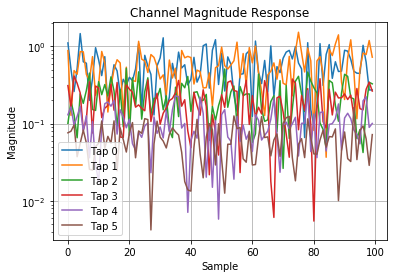

In [11]:
import numpy as np

#channel_coeff_np = channel_coeff.to_numpy_ndarray()

channel_coeff_np = np.ndarray((channel_coeff.rows(), channel_coeff.cols()), dtype=np.complex128)
for r in range(channel_coeff.rows()):
    for c in range(channel_coeff.cols()):
        channel_coeff_np[r, c] = channel_coeff.get(r, c)

plt.figure()
plt.grid(True)
legend_strings = []
for tap in range(nrof_taps):
    plt.semilogy(abs(channel_coeff_np[:, tap]))
    legend_strings.append('Tap ' + str(tap))

plt.legend(legend_strings)
plt.title('Channel Magnitude Response')
plt.xlabel('Sample')
plt.ylabel('Magnitude')

# Plot channel frequency response

In [ ]:
freq_resp = itpp.cmat()

channel.calc_frequency_response(channel_coeff, freq_resp, fft_size=256)

freq_resp_np = freq_resp.to_numpy_ndarray()

plt.figure()
plt.grid(True)
legend_strings = []
for frame_index in range(10):
    plt.semilogy(abs(freq_resp_np[:, frame_index]))
    legend_strings.append('Sample ' + str(frame_index))

plt.legend(legend_strings)
plt.title('Channel Frequency Response')
plt.xlabel('Subcarrier')
plt.ylabel('Magnitude')